Цель: улучшение качества данных.


Необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник.

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удаляем все пропущенные значения и категориальные переменные.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Удаление категориальных значений
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(df.Ticket.unique()) #уникальные значения ticket

681

In [ ]:
df_pred = df[['Survived','Pclass','Sex', 'Age','SibSp','Parch']]
gend_enc = {'male':0,'female':1}
df_pred['Sex'] =df_pred['Sex'].map(gend_enc)
df_pred.head(3)

<ipython-input-278-3725c54dca60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['Sex'] =df_pred['Sex'].map(gend_enc)


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0


In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [ ]:
df2 =df_pred.dropna(how ='any', axis =0) #Удаление строк где хотя бы в одном ряду значение равно null
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 39.0 KB


Обучение модели и проверка уровня качества

In [ ]:
y = df2['Survived']

In [ ]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [ ]:
X = df2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =37)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.819614711033275

In [ ]:
model.score(X_test, y_test) #точность тестовых и обучающих выборок приблизитено равны.

0.7762237762237763

Снова загрузим данные и удалим признаки не нужные для построения модели.


In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df_pred.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0


In [ ]:
len(df.PassengerId.unique())

891

In [ ]:
len(df.Ticket.unique())

681

In [ ]:
len(df.Cabin.unique()) # 148 уникальных значений кают.

148

In [ ]:
df.Cabin.isnull().sum() #687 пассажиров не имеет номера кают.
# 148+687 = 835. 891 -835 = 55. Т.е. 55 пассажиров живут вместе еще с кем то. В данных много пропусков.

687

Задача поставлена о предсказании выживаемости пассажира.
 Строка PassegerId не нужна - это уникальное значение каждого пассажира. Уникальные значения не обучат сеть.

  Pclass нужен т.к. от класса зависело то какой палубе находился пассажир на корабле. 1 Класс был на верхних палубах.
  
   ФИО - уникальный идентификатор по сути.Поэтому удаляем.

   SibSp, Parch  - количество родсвенников на борту. Можно попоробовать оставить. Больше родственников - больше мотивации выжить и спасти родственников.

   Ticket - номер билета. Уникальных значений порядка 80 проц. Тоже можно убрать.

   Fare - Плата за проезд. За выживаемость не отвечает. Можно убрать.

   Cabin - номер каюты. Много пропусков. Уникальных значений тоже мало. Можно удалить.

   Embarked - порт посадки. Слабо зависит от выживаемости. Удаляем.
   
   От пола и возраста зависит выносливость пассажира и возможность выжить в холодной воде и шанс попасть  в спасательную шлюпку. Оставляем.

Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [ ]:
df.info() #начальные данные Всего 891 значение

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_pred.info() # подготовленные данные.
# Данных без пропусков у нас 714 (пропуски в age).
#Таким образом  если удалить данные с пропусками то мы потеряем (891-714)/891*100 = 20 % данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


Необходимо заполнить пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом.

In [ ]:
df_pred_b = df_pred.copy() # в данном датафрейме есть пропуски в возрасте. Численную переменную можно заменить на среднее


df_pred_b.Age = df_pred_b.Age.fillna(df_pred_b.Age.mean()) # замена отсутствующих значений на средее

In [ ]:
df_pred_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [ ]:
df_pred.describe() # в наших данных выбросы могут быть по Age	SibSp	Parch.
# Age - среднее 30 лет  1 и 3 квантили на 20 и 38 годах. Есть выбросы. Про SibSp и Parch можно сказать то же самое.

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8b48d13c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8b48d1900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8b48d1120>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8b48d1e40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8b48d20e0>],
 'means': []}

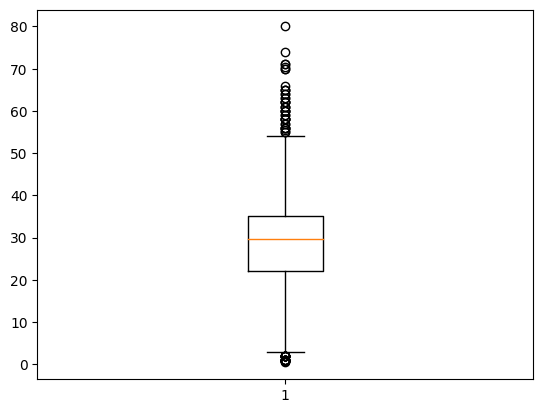

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_pred_b['Age'])# Видны выбросы более 55 лет и до 3 лет.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8b4749ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8b48faef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8b4749900>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8b4749f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8b474a200>],
 'means': []}

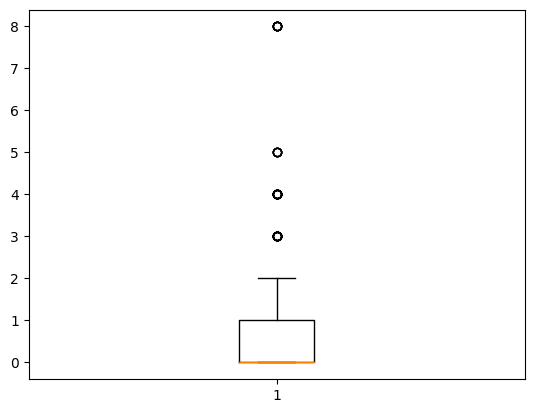

In [ ]:
plt.boxplot(df_pred_b['SibSp'])# есть выбросы в местах больше 3 родственников

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8b47ccc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8b47cd150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8b47cca90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8b47cd690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8b47cd930>],
 'means': []}

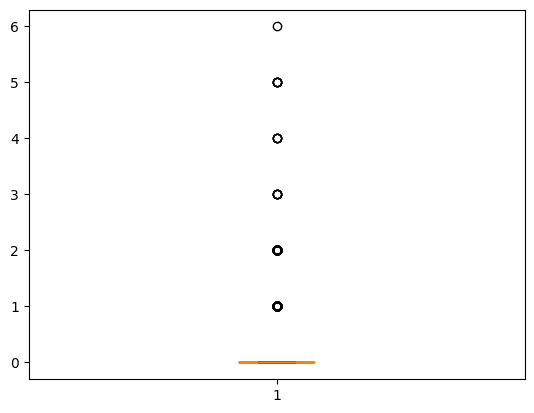

In [ ]:
plt.boxplot(df_pred_b['Parch'])# По статистике видно что мало кто ехал с родителями и приемными детьми.

In [ ]:
df_pred_b.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [ ]:
y = df_pred_b['Survived']
X = df_pred_b[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =37)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.7921348314606742

In [ ]:
model.score(X_test, y_test) # замена на средее немного повысило точнсоть модели. И увеличило сходимость тестовой и тренровочной выборки.

0.7821229050279329

In [ ]:
# Попробуем объединить родственников 'SibSp', 'Parch'

In [ ]:
df_pred_с = df_pred_b.copy()
df_pred_с['people'] = df_pred_с['SibSp'] + df_pred_с['Parch']


In [ ]:
df_pred_с.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,people
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,0


In [ ]:
y = df_pred_с['Survived']
X = df_pred_с[['Pclass', 'Sex', 'Age', 'people']]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =37)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.797752808988764

In [ ]:
model.score(X_test, y_test) # разницы почти нет.

0.7821229050279329

In [ ]:
# удаление выбросов по возрасту. Возраст больше 55 лет не пойдет в метрику.

In [ ]:
df_pred_d = df_pred_с.copy()
df_pred_d = df_pred_d[df_pred_d.Age<55]

df_pred_d.info() # удалено 42 значения (5%)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  849 non-null    int64  
 1   Pclass    849 non-null    int64  
 2   Sex       849 non-null    int64  
 3   Age       849 non-null    float64
 4   SibSp     849 non-null    int64  
 5   Parch     849 non-null    int64  
 6   people    849 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 53.1 KB


In [ ]:
y = df_pred_d['Survived']
X = df_pred_d[['Pclass', 'Sex', 'Age', 'people']]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =37)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7879234167893961

In [ ]:
model.score(X_test, y_test) # немного точнность повыслась, причем на тестовой больше чем на учебной, что можно объянить разбросом.

0.8235294117647058

In [ ]:
# удалим выбросы с количеством people >= 2.

In [ ]:
df_pred_d = df_pred_d[df_pred_d.people<2]

In [ ]:
df_pred_d.info() # осталось 75 проц данных.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  661 non-null    int64  
 1   Pclass    661 non-null    int64  
 2   Sex       661 non-null    int64  
 3   Age       661 non-null    float64
 4   SibSp     661 non-null    int64  
 5   Parch     661 non-null    int64  
 6   people    661 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 41.3 KB


In [ ]:
y = df_pred_d['Survived']
X = df_pred_d[['Pclass', 'Sex', 'Age', 'people']]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =37)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8068181818181818

In [ ]:
model.score(X_test, y_test) # Удаление выбросов по родтвенникам так же не значительно увеличивает точность модели. Причем на тестовой выборке на 5 процентов. Скорее всего это разброс.

0.8571428571428571

Выводы: были выбраны данные для обучения линейной регрессии.
В начале были удалены пропуски и проведена оценка точности модели. Она составляет 77 и 82 процента на тестовой и обучающих выборках.
Далее из начльного датафрейма на место пропусков в графе 'age' были поставлены средние значения, затем были объединены графы с родителями и родстенниками в графу 'people', удалены выбросы из граф Age и 'people'. В результате удалось повысить точность модели до 81 и 86 процентов на тестовой и обучающей выборках.
С учетом разбоса в 5% процентов между обеими тестовыми и обучающими выборками, можно сделать предположение, что это статистический разброс.
 Чтобы убедиться что это не разброс, рекомендуется много раз обучить модель с различным Random state и усреднить получившейся model.score, затем сравнить данные до  и после обработки. возможно Проверить с помощью t-критерия стьюдента.